In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df_auto = pd.read_csv(r'c:/Users/v_gol/Desktop/car-price-prediction-israel/data/autoboom_data.csv')
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body
0,"Tesla Model 3, 2022",₪ 169 999,47 000 km,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan
1,"Peugeot 2008, 2018",₪ 55 900,89 000 km,1st hand,Gasoline,1.2 l,110 hp,Automatic,FWD,White,Estate 5-door
2,"Toyota Corolla, 2007",₪ 17 000,260 000 km,3rd hand,Gasoline,1.6 l,110 hp,Automatic,FWD,Silver,Sedan
3,"MG EHS, 2021",₪ 128 000,27 000 km,2nd hand,Plug-in Hybrid,1.5 l,258 hp,Automatic,FWD,White,SUV 5-doors
4,"SEAT Ibiza, 2023",₪ 92 500,24 000 km,1st hand,Gasoline,1.0 l,110 hp,Robotic,FWD,Silver,Mini 5-doors


## Preprocessing 

In [18]:
# Remove '₪' symbol and extra spaces, then convert to numeric
df_auto['car_price_highlighted'] = df_auto['car_price_highlighted'].str.replace('₪', '').str.replace(' ', '').str.replace('\u00a0', '').astype(float)

# Display the cleaned dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body
0,"Tesla Model 3, 2022",169999.0,47 000 km,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan
1,"Peugeot 2008, 2018",55900.0,89 000 km,1st hand,Gasoline,1.2 l,110 hp,Automatic,FWD,White,Estate 5-door
2,"Toyota Corolla, 2007",17000.0,260 000 km,3rd hand,Gasoline,1.6 l,110 hp,Automatic,FWD,Silver,Sedan
3,"MG EHS, 2021",128000.0,27 000 km,2nd hand,Plug-in Hybrid,1.5 l,258 hp,Automatic,FWD,White,SUV 5-doors
4,"SEAT Ibiza, 2023",92500.0,24 000 km,1st hand,Gasoline,1.0 l,110 hp,Robotic,FWD,Silver,Mini 5-doors


In [19]:
# Split the 'car_title' column into 'car_name' and 'car_year'
df_auto[['car_name', 'car_year']] = df_auto['car_title'].str.split(',', expand=True)

# Strip any leading/trailing whitespace from the new columns
df_auto['car_name'] = df_auto['car_name'].str.strip()
df_auto['car_year'] = df_auto['car_year'].str.strip()

# Display the updated dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year
0,"Tesla Model 3, 2022",169999.0,47 000 km,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan,Tesla Model 3,2022
1,"Peugeot 2008, 2018",55900.0,89 000 km,1st hand,Gasoline,1.2 l,110 hp,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018
2,"Toyota Corolla, 2007",17000.0,260 000 km,3rd hand,Gasoline,1.6 l,110 hp,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007
3,"MG EHS, 2021",128000.0,27 000 km,2nd hand,Plug-in Hybrid,1.5 l,258 hp,Automatic,FWD,White,SUV 5-doors,MG EHS,2021
4,"SEAT Ibiza, 2023",92500.0,24 000 km,1st hand,Gasoline,1.0 l,110 hp,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023


In [20]:
# Remove spaces, non-breaking spaces, and 'km' from 'car_km' column, then convert to numeric
df_auto['car_km'] = df_auto['car_km'].str.replace(' ', '').str.replace('\xa0', '').str.replace('km', '').astype(float)

# Display the cleaned dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan,Tesla Model 3,2022
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2 l,110 hp,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6 l,110 hp,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5 l,258 hp,Automatic,FWD,White,SUV 5-doors,MG EHS,2021
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0 l,110 hp,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023


In [21]:
df_auto['car_hand'].unique()

array(['2nd hand', '1st hand', '3rd hand', '4th hand'], dtype=object)

In [22]:
df_auto['car_engine'] = df_auto['car_engine'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Display the cleaned dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan,Tesla Model 3,2022
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110 hp,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110 hp,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258 hp,Automatic,FWD,White,SUV 5-doors,MG EHS,2021
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110 hp,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023


In [23]:
df_auto['car_hp'] = df_auto['car_hp'].str.replace(' hp', '').str.replace(' ', '').astype(float)

# Display the cleaned dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283.0,Automatic,RWD,White,Sedan,Tesla Model 3,2022
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110.0,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110.0,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258.0,Automatic,FWD,White,SUV 5-doors,MG EHS,2021
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110.0,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023


In [24]:
from datetime import datetime

# Get the current year
current_year = 2024

# Convert 'car_year' to numeric and calculate the car age
df_auto['car_year'] = pd.to_numeric(df_auto['car_year'], errors='coerce')
df_auto['car_ages'] = current_year - df_auto['car_year']

# Display the updated dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year,car_ages
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283.0,Automatic,RWD,White,Sedan,Tesla Model 3,2022,2
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110.0,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018,6
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110.0,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007,17
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258.0,Automatic,FWD,White,SUV 5-doors,MG EHS,2021,3
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110.0,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023,1


                       car_title  car_price_highlighted   car_km  car_hand  \
44                Lexus RX, 2023               520000.0  28000.0  2nd hand   
316             Volvo XC40, 2022               240000.0  30000.0  1st hand   
399        Cupra Formentor, 2022               217000.0  31000.0  1st hand   
419       Mercedes A-Class, 2022               220000.0  25000.0  1st hand   
456       Mercedes E-Class, 2022               443000.0  53000.0  1st hand   
...                          ...                    ...      ...       ...   
4783          BMW 3 series, 2019               245000.0  47000.0  2nd hand   
4787   Porsche 718 Boxster, 2021               555000.0  30000.0  3rd hand   
4792  Mercedes C-Class AMG, 2024               655000.0     21.0  1st hand   
4793          Mercedes GLA, 2023               310000.0  11000.0  1st hand   
4795          Mercedes GLC, 2024               488000.0     11.0  1st hand   

            car_fuel  car_engine  car_hp car_transmission car_d

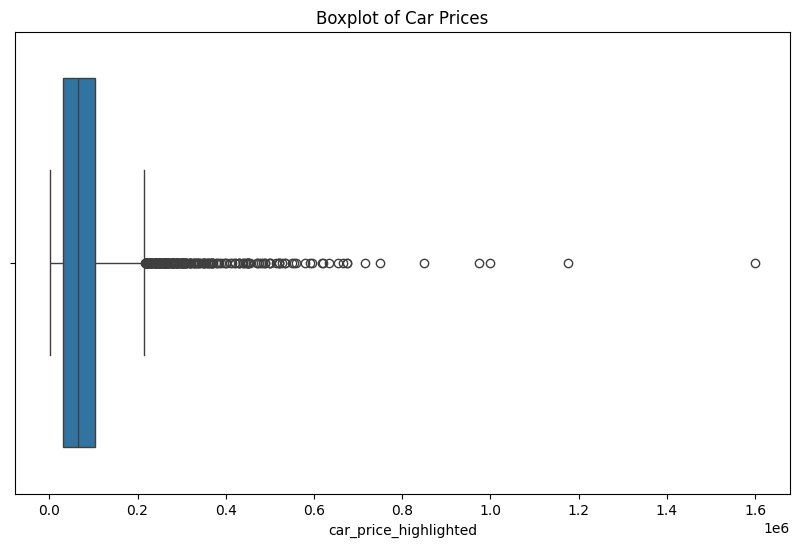

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_auto['car_price_highlighted'].quantile(0.25)
Q3 = df_auto['car_price_highlighted'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_auto[(df_auto['car_price_highlighted'] < lower_bound) | (df_auto['car_price_highlighted'] > upper_bound)]

# Display the outliers
print(outliers)

# Visualize the outliers using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_auto['car_price_highlighted'])
plt.title('Boxplot of Car Prices')
plt.show()

In [26]:
# Filter the dataframe to keep only non-outliers
df_auto_non_outliers = df_auto[(df_auto['car_price_highlighted'] >= lower_bound) & (df_auto['car_price_highlighted'] <= upper_bound)]

# Display the filtered dataframe
df_auto_non_outliers.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year,car_ages
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283.0,Automatic,RWD,White,Sedan,Tesla Model 3,2022,2
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110.0,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018,6
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110.0,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007,17
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258.0,Automatic,FWD,White,SUV 5-doors,MG EHS,2021,3
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110.0,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023,1


In [27]:
# Check normality of price using Shapiro-Wilk test on a sample
price_sample = df_auto['car_price_highlighted'].sample(n=500, random_state=123)
_, p_value = stats.shapiro(price_sample)
print(f"Shapiro-Wilk test for price: p-value = {p_value}")

Shapiro-Wilk test for price: p-value = 1.1165735242879914e-28


Prices are not normally distributed

Shapiro-Wilk test for log-transformed price: p-value = 0.0005311202617205345


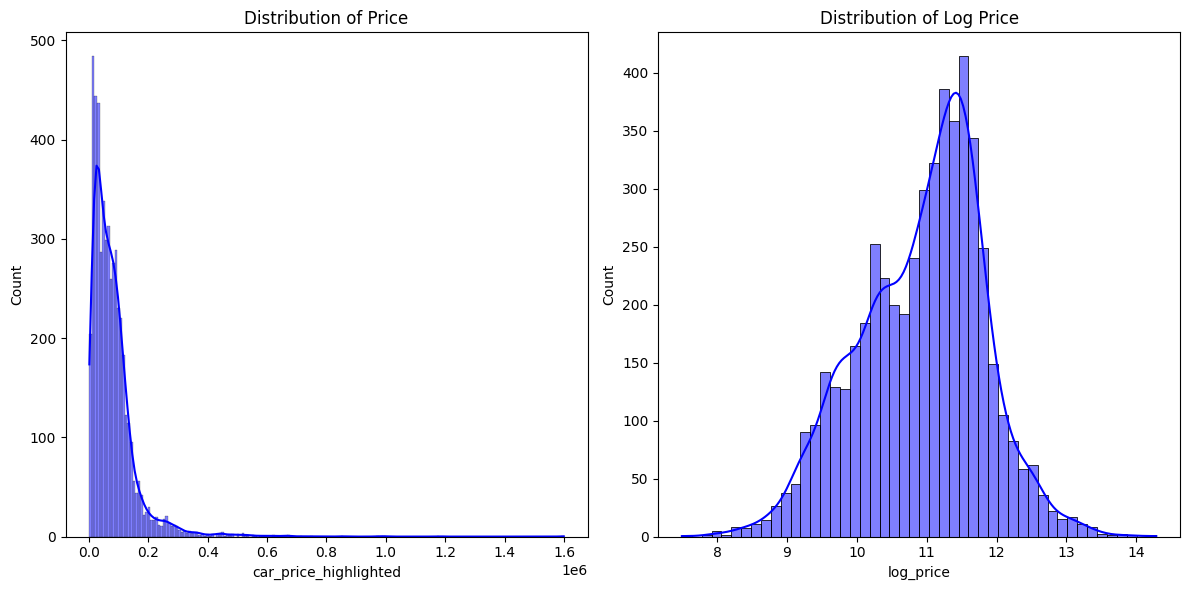

In [28]:
# Log transformation if price is skewed
df_auto['log_price'] = np.log(df_auto['car_price_highlighted'])

# Check normality of log-transformed price
log_price_sample = df_auto['log_price'].sample(n=500, random_state=123)
_, p_value = stats.shapiro(log_price_sample)
print(f"Shapiro-Wilk test for log-transformed price: p-value = {p_value}")

# Plot distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_auto['car_price_highlighted'], kde=True, color='blue')
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(df_auto['log_price'], kde=True, color='blue')
plt.title('Distribution of Log Price')
plt.tight_layout()
plt.show()

In [29]:
# Filter the dataframe to keep only non-outliers
df_auto = df_auto[(df_auto['car_price_highlighted'] >= lower_bound) & (df_auto['car_price_highlighted'] <= upper_bound)]

# Display the filtered dataframe
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year,car_ages,log_price
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283.0,Automatic,RWD,White,Sedan,Tesla Model 3,2022,2,12.043548
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110.0,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018,6,10.931320
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110.0,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007,17,9.740969
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258.0,Automatic,FWD,White,SUV 5-doors,MG EHS,2021,3,11.759786
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110.0,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023,1,11.434964


In [30]:
import pandas as pd
import numpy as np
from scipy import stats

# Check normality of log-transformed price using Shapiro-Wilk test on a sample
log_price_sample = df_auto['log_price'].sample(n=500, random_state=123)
_, log_p_value = stats.shapiro(log_price_sample)
print(f"Shapiro-Wilk test for log-transformed price: p-value = {log_p_value}")

# Interpretation
if log_p_value < 0.05:
    print("The log-transformed car prices are not normally distributed (reject null hypothesis).")
else:
    print("The log-transformed car prices are normally distributed (fail to reject null hypothesis).")

Shapiro-Wilk test for log-transformed price: p-value = 4.128594052410331e-11
The log-transformed car prices are not normally distributed (reject null hypothesis).


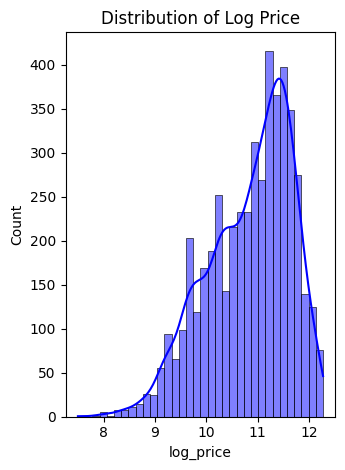

In [31]:
plt.subplot(1, 2, 2)
sns.histplot(df_auto['log_price'], kde=True, color='blue')
plt.title('Distribution of Log Price')
plt.tight_layout()
plt.show()

In [32]:
df_auto.columns

Index(['car_title', 'car_price_highlighted', 'car_km', 'car_hand', 'car_fuel',
       'car_engine', 'car_hp', 'car_transmission', 'car_drive', 'car_color',
       'car_body', 'car_name', 'car_year', 'car_ages', 'log_price'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     265.4
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:04:52   Log-Likelihood:                -1994.6
No. Observations:                4888   AIC:                             4139.
Df Residuals:                    4813   BIC:                             4626.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

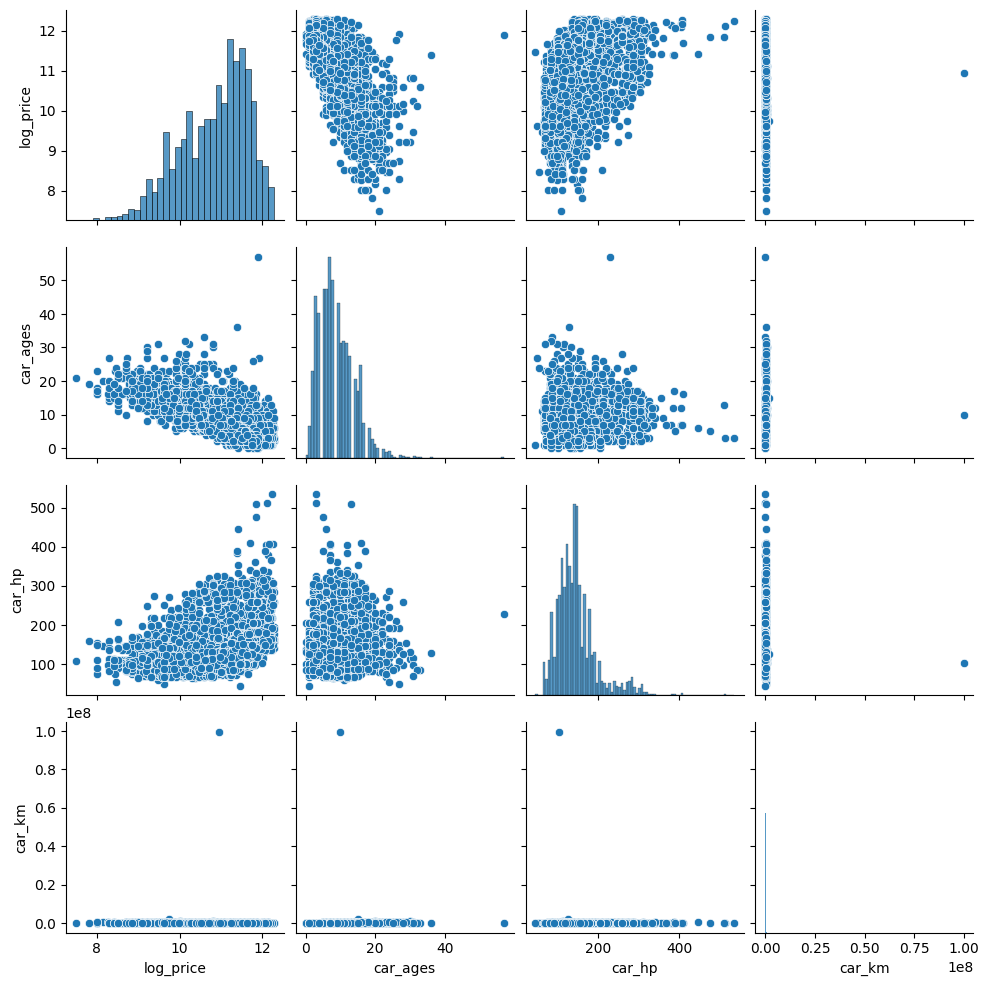

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Fit the model using the training data
model = smf.ols(formula='log_price ~ car_ages + car_hp + car_body + car_km+car_hand+car_fuel+car_transmission+car_drive+car_color', data=df_auto).fit()

# Print the summary of the model
print(model.summary())

# Check for linearity
sns.pairplot(df_auto[['log_price', 'car_ages', 'car_hp', 'car_body', 'car_km', 'car_hand', 'car_fuel', 'car_transmission', 'car_drive', 'car_color']])
plt.show()


In [35]:
# Check for independence of residuals
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

# Interpretation of Durbin-Watson statistic
if dw_stat < 1.5:
    print("There is evidence of positive autocorrelation.")
elif 1.5 <= dw_stat <= 2.5:
    print("There is no evidence of autocorrelation.")
else:
    print("There is evidence of negative autocorrelation.")

Durbin-Watson statistic: 1.9005646394368134
There is no evidence of autocorrelation.


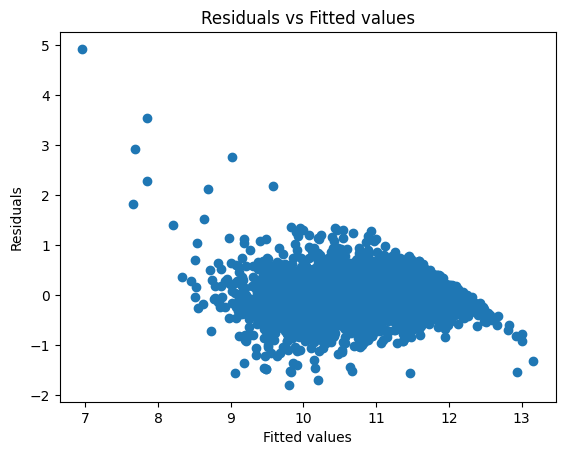

In [36]:
# Check for homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

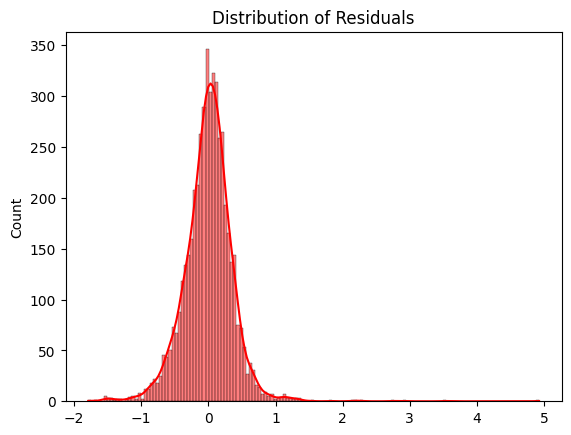

In [37]:
# Plot residuals for normality
sns.histplot(model.resid, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.show()

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     265.4
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:06:12   Log-Likelihood:                -1994.6
No. Observations:                4888   AIC:                             4139.
Df Residuals:                    4813   BIC:                             4626.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [39]:
# Fit the model using the training data with robust standard errors
model = smf.ols(formula='log_price ~ car_ages + car_hp + car_body + car_km + car_hand + car_fuel + car_transmission + car_drive + car_color', data=df_auto).fit(cov_type='HC1')

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:06:29   Log-Likelihood:                -1994.6
No. Observations:                4888   AIC:                             4139.
Df Residuals:                    4813   BIC:                             4626.
Df Model:                          74                                         
Covariance Type:                  HC1                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\Users\v_gol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 69
  warnings.warn('covariance of constraints does not have full '


In [41]:
df_auto.head()

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_name,car_year,car_ages,log_price
0,"Tesla Model 3, 2022",169999.0,47000.0,2nd hand,Electro,NaN,283.0,Automatic,RWD,White,Sedan,Tesla Model 3,2022,2,12.043548
1,"Peugeot 2008, 2018",55900.0,89000.0,1st hand,Gasoline,1.2,110.0,Automatic,FWD,White,Estate 5-door,Peugeot 2008,2018,6,10.931320
2,"Toyota Corolla, 2007",17000.0,260000.0,3rd hand,Gasoline,1.6,110.0,Automatic,FWD,Silver,Sedan,Toyota Corolla,2007,17,9.740969
3,"MG EHS, 2021",128000.0,27000.0,2nd hand,Plug-in Hybrid,1.5,258.0,Automatic,FWD,White,SUV 5-doors,MG EHS,2021,3,11.759786
4,"SEAT Ibiza, 2023",92500.0,24000.0,1st hand,Gasoline,1.0,110.0,Robotic,FWD,Silver,Mini 5-doors,SEAT Ibiza,2023,1,11.434964


In [42]:
df_auto['car_body'].unique()    

array(['Sedan', 'Estate 5-door', 'SUV 5-doors', 'Mini 5-doors',
       'Compact Van', 'Liftback', 'Hatchback 5-door', 'SUV Coupe',
       'Pickup double-cab', 'Van Short', 'Van', 'Coupe', 'Mini 3-doors',
       'Hatchback 3-door', 'SUV 3-doors', 'Hatchback 4-door', 'Minivan',
       'Cabrio', 'SUV cabriolet', 'Limousine', 'Roadster', 'Sedan Long',
       'Minibus', 'Minivan Short', 'Fastback', 'Van Long', 'Minibus Long',
       'Minivan Long'], dtype=object)

In [43]:
# Define a mapping for normalization
car_body_mapping = {
    'Sedan': 'Sedan',
    'Estate 5-door': 'Hatchback',
    'SUV 5-doors': 'SUV',
    'Mini 5-doors': 'Hatchback',
    'Compact Van': 'MUV',
    'Liftback': 'Hatchback',
    'Hatchback 5-door': 'Hatchback',
    'SUV Coupe': 'SUV',
    'Pickup double-cab': 'Pickup Truck',
    'Van Short': 'MUV',
    'Van': 'MUV',
    'Coupe': 'Coupe',
    'Mini 3-doors': 'Hatchback',
    'Hatchback 3-door': 'Hatchback',
    'SUV 3-doors': 'SUV',
    'Hatchback 4-door': 'Hatchback',
    'Minivan': 'MUV',
    'Cabrio': 'Convertible',
    'SUV cabriolet': 'Convertible',
    'Limousine': 'Sedan',
    'Roadster': 'Convertible',
    'Sedan Long': 'Sedan',
    'Minibus': 'MUV',
    'Minivan Short': 'MUV',
    'Fastback': 'Hatchback',
    'Van Long': 'MUV',
    'Minibus Long': 'MUV',
    'Minivan Long': 'MUV'
}

# Normalize the car_body column
df_auto.loc[:, 'car_body_normalized'] = df_auto['car_body'].map(car_body_mapping)

# Display the updated dataframe
print(df_auto['car_body_normalized'].unique())

['Sedan' 'Hatchback' 'SUV' 'MUV' 'Pickup Truck' 'Coupe' 'Convertible']


In [44]:
# Fit the model using the training data with robust standard errors
model = smf.ols(formula='log_price ~ car_ages + car_hp + car_body_normalized + car_km + car_hand + car_fuel + car_transmission + car_drive', data=df_auto).fit(cov_type='HC1')

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     716.7
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:06:54   Log-Likelihood:                -2220.8
No. Observations:                4888   AIC:                             4486.
Df Residuals:                    4866   BIC:                             4628.
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\Users\v_gol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  warnings.warn('covariance of constraints does not have full '


In [45]:
# Encode non-numeric columns
df_auto_norm = pd.get_dummies(df_auto, drop_first=True)

# Replace spaces and hyphens with underscores in column names
df_auto_norm.columns = df_auto_norm.columns.str.replace(' ', '_').str.replace('-', '_')

# Fit the model using the training data with robust standard errors
model = smf.ols(formula='log_price ~ car_ages + car_hp + car_km + car_body_normalized_Coupe + car_body_normalized_Hatchback + car_body_normalized_MUV + car_body_normalized_Pickup_Truck + car_body_normalized_SUV + car_body_normalized_Sedan + car_hand_2nd_hand + car_hand_3rd_hand + car_hand_4th_hand + car_fuel_Electro + car_fuel_Gasoline + car_fuel_Hybrid + car_fuel_Plug_in_Hybrid + car_transmission_Manual + car_transmission_Robotic + car_transmission_Variable + car_drive_FWD + car_drive_RWD', data=df_auto_norm).fit(cov_type='HC1')

# Print the summary of the model
print(model.summary())

# Convert boolean columns to integers
df_auto_norm = df_auto_norm.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Calculate VIF for each independent variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Interpretation
high_vif_features = vif_data[vif_data['VIF'] > 10]
if not high_vif_features.empty:
    print("High VIF features indicating multicollinearity:")
    print(high_vif_features)
else:
    print("No multicollinearity detected.")

C:\Users\v_gol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  warnings.warn('covariance of constraints does not have full '
C:\Users\v_gol\AppData\Local\Temp\ipykernel_19520\2786212531.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_auto_norm = df_auto_norm.applymap(lambda x: int(x) if isinstance(x, bool) else x)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     716.7
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:40:19   Log-Likelihood:                -2220.8
No. Observations:                4888   AIC:                             4486.
Df Residuals:                    4866   BIC:                             4628.
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [48]:
df_auto_norm.columns

Index(['car_price_highlighted', 'car_km', 'car_engine', 'car_hp', 'car_year',
       'car_ages', 'log_price', 'car_title_Abarth_500,_2016',
       'car_title_Aiways_U5,_2022', 'car_title_Alfa_Romeo_159,_2008',
       ...
       'car_name_Volvo_V50', 'car_name_Volvo_XC40', 'car_name_Volvo_XC60',
       'car_name_Volvo_XC90', 'car_body_normalized_Coupe',
       'car_body_normalized_Hatchback', 'car_body_normalized_MUV',
       'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV',
       'car_body_normalized_Sedan'],
      dtype='object', length=2378)

In [51]:
df_auto.columns

Index(['car_title', 'car_price_highlighted', 'car_km', 'car_hand', 'car_fuel',
       'car_engine', 'car_hp', 'car_transmission', 'car_drive', 'car_color',
       'car_body', 'car_name', 'car_year', 'car_ages', 'log_price',
       'car_body_normalized'],
      dtype='object')

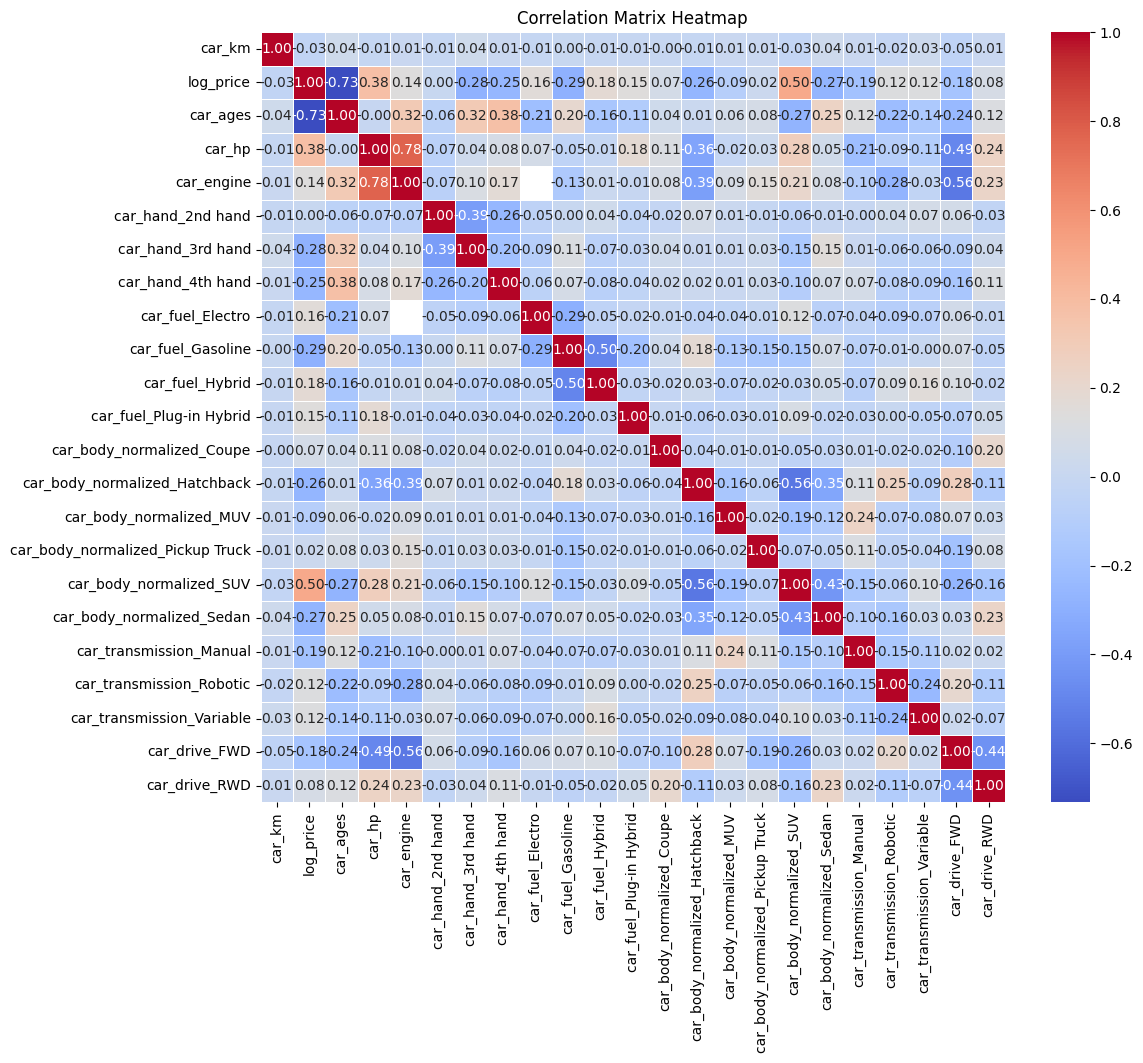

In [52]:
# Select the relevant columns
selected_columns = ['car_km', 'car_hand', 'car_fuel', 'log_price', 'car_ages', 'car_body_normalized', 'car_hp', 'car_transmission', 'car_drive', 'car_engine']

# Filter the dataframe to keep only the selected columns
df_selected = df_auto[selected_columns]

# Encode non-numeric columns
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Fit the model using PCA components
model_pca = sm.OLS(df_auto['log_price'], sm.add_constant(X_pca)).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     935.6
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:46:39   Log-Likelihood:                -2421.9
No. Observations:                4888   AIC:                             4880.
Df Residuals:                    4870   BIC:                             4997.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8415      0.006   1905.068      0.0

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_auto is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]

X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rmse_scores = []

for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_pca = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    predictions = model_pca.predict(sm.add_constant(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)

# Calculate Mean RMSE and Standard Deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Cross-Validation RMSE Scores: [np.float64(0.4081673841732749), np.float64(2.328773839461496), np.float64(0.3907397568958221), np.float64(0.4097586800901856), np.float64(0.3995155313790053)]
Mean RMSE: 0.7873910383999567
Standard Deviation of RMSE: 0.7707213978399181


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_auto is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_pca), 1):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_pca = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    predictions = model_pca.predict(sm.add_constant(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold} RMSE: {rmse}")

# Calculate Mean RMSE and Standard Deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Fold 1 RMSE: 0.4081673841732749
Fold 2 RMSE: 2.328773839461496
Fold 3 RMSE: 0.3907397568958221
Fold 4 RMSE: 0.4097586800901856
Fold 5 RMSE: 0.3995155313790053
Cross-Validation RMSE Scores: [np.float64(0.4081673841732749), np.float64(2.328773839461496), np.float64(0.3907397568958221), np.float64(0.4097586800901856), np.float64(0.3995155313790053)]
Mean RMSE: 0.7873910383999567
Standard Deviation of RMSE: 0.7707213978399181


Fold 2 RMSE: 2.328773839461496
count    978.000000
mean       0.049942
std        2.329429
min       -1.616368
25%       -0.237918
50%       -0.002715
75%        0.202951
max       71.830828
Name: log_price, dtype: float64


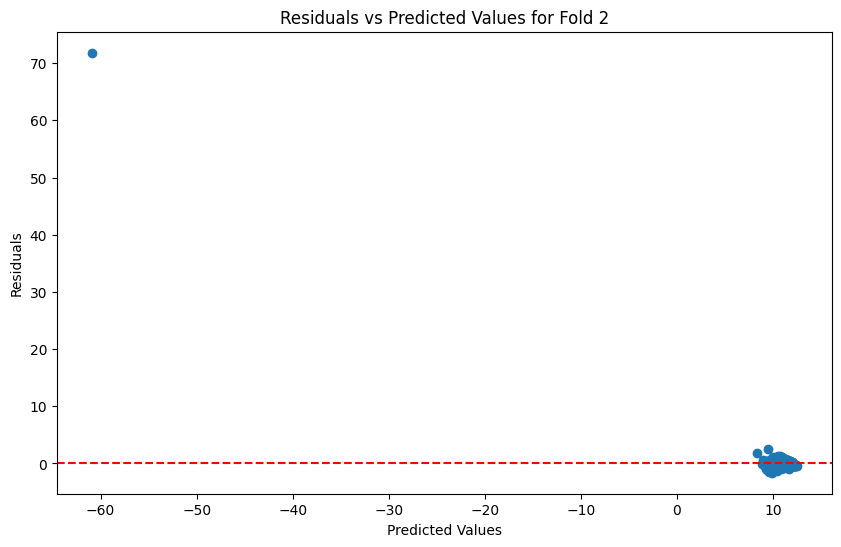

In [56]:
# Investigate Fold 2
fold_2_train_index, fold_2_test_index = list(kf.split(X_pca))[1]
X_train_fold_2, X_test_fold_2 = X_pca[fold_2_train_index], X_pca[fold_2_test_index]
y_train_fold_2, y_test_fold_2 = y.iloc[fold_2_train_index], y.iloc[fold_2_test_index]

# Fit the model on Fold 2
model_fold_2 = sm.OLS(y_train_fold_2, sm.add_constant(X_train_fold_2)).fit()
predictions_fold_2 = model_fold_2.predict(sm.add_constant(X_test_fold_2))
rmse_fold_2 = np.sqrt(mean_squared_error(y_test_fold_2, predictions_fold_2))

print(f"Fold 2 RMSE: {rmse_fold_2}")

# Examine the residuals
residuals_fold_2 = y_test_fold_2 - predictions_fold_2
print(residuals_fold_2.describe())

# Plot the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(predictions_fold_2, residuals_fold_2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Fold 2')
plt.show()

Fold 1 RMSE: 0.4081673841732749
Fold 2 RMSE: 2.328773839461496
Fold 3 RMSE: 0.3907397568958221
Fold 4 RMSE: 0.4097586800901856
Fold 5 RMSE: 0.3995155313790053
Fold 2 RMSE: 2.328773839461496
count    978.000000
mean       0.049942
std        2.329429
min       -1.616368
25%       -0.237918
50%       -0.002715
75%        0.202951
max       71.830828
Name: log_price, dtype: float64
Number of outliers in Fold 2: 1
Fold 2 RMSE without outliers: 0.38419331295658243


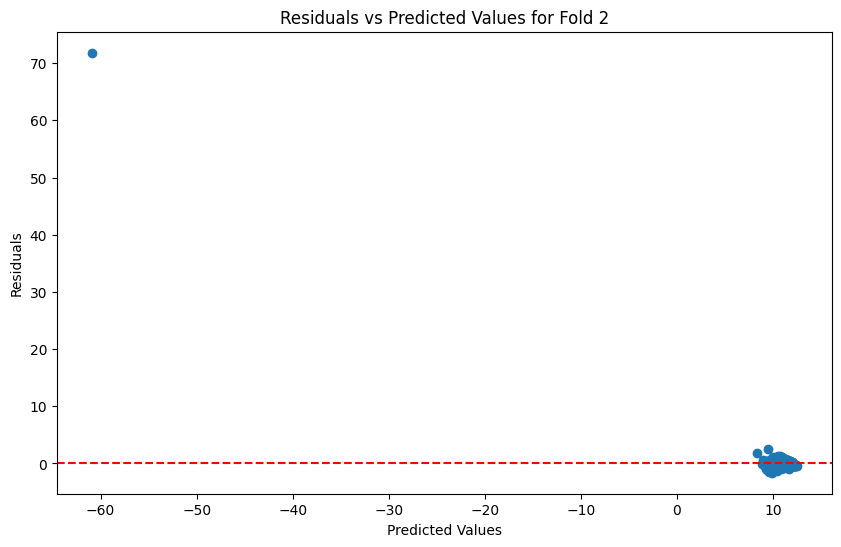

Cross-Validation RMSE Scores without Fold 2 outliers: [np.float64(0.4081673841732749), np.float64(0.3907397568958221), np.float64(0.4097586800901856), np.float64(0.3995155313790053), np.float64(0.38419331295658243)]
Mean RMSE without Fold 2 outliers: 0.3984749330989741
Standard Deviation of RMSE without Fold 2 outliers: 0.00986049718376483


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_auto is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_pca), 1):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_pca = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    predictions = model_pca.predict(sm.add_constant(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold} RMSE: {rmse}")

# Investigate Fold 2
fold_2_train_index, fold_2_test_index = list(kf.split(X_pca))[1]
X_train_fold_2, X_test_fold_2 = X_pca[fold_2_train_index], X_pca[fold_2_test_index]
y_train_fold_2, y_test_fold_2 = y.iloc[fold_2_train_index], y.iloc[fold_2_test_index]

# Fit the model on Fold 2
model_fold_2 = sm.OLS(y_train_fold_2, sm.add_constant(X_train_fold_2)).fit()
predictions_fold_2 = model_fold_2.predict(sm.add_constant(X_test_fold_2))
rmse_fold_2 = np.sqrt(mean_squared_error(y_test_fold_2, predictions_fold_2))

print(f"Fold 2 RMSE: {rmse_fold_2}")

# Examine the residuals
residuals_fold_2 = y_test_fold_2 - predictions_fold_2
print(residuals_fold_2.describe())

# Identify outliers (e.g., residuals greater than 3 standard deviations from the mean)
outliers = residuals_fold_2[np.abs(residuals_fold_2) > 3 * residuals_fold_2.std()]
print(f"Number of outliers in Fold 2: {len(outliers)}")

# Remove outliers from Fold 2
X_test_fold_2_no_outliers = X_test_fold_2[~residuals_fold_2.index.isin(outliers.index)]
y_test_fold_2_no_outliers = y_test_fold_2[~residuals_fold_2.index.isin(outliers.index)]

# Recalculate RMSE for Fold 2 without outliers
predictions_fold_2_no_outliers = model_fold_2.predict(sm.add_constant(X_test_fold_2_no_outliers))
rmse_fold_2_no_outliers = np.sqrt(mean_squared_error(y_test_fold_2_no_outliers, predictions_fold_2_no_outliers))

print(f"Fold 2 RMSE without outliers: {rmse_fold_2_no_outliers}")

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions_fold_2, residuals_fold_2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Fold 2')
plt.show()

# Recalculate overall RMSE without Fold 2 outliers
rmse_scores_no_outliers = [rmse for i, rmse in enumerate(rmse_scores) if i != 1]
rmse_scores_no_outliers.append(rmse_fold_2_no_outliers)
mean_rmse_no_outliers = np.mean(rmse_scores_no_outliers)
std_rmse_no_outliers = np.std(rmse_scores_no_outliers)

print(f"Cross-Validation RMSE Scores without Fold 2 outliers: {rmse_scores_no_outliers}")
print(f"Mean RMSE without Fold 2 outliers: {mean_rmse_no_outliers}")
print(f"Standard Deviation of RMSE without Fold 2 outliers: {std_rmse_no_outliers}")

Fold 1 RMSE: 0.4081673841732749
Fold 2 RMSE: 2.328773839461496
Fold 3 RMSE: 0.3907397568958221
Fold 4 RMSE: 0.4097586800901856
Fold 5 RMSE: 0.3995155313790053
Fold 2 RMSE: 2.328773839461496
count    978.000000
mean       0.049942
std        2.329429
min       -1.616368
25%       -0.237918
50%       -0.002715
75%        0.202951
max       71.830828
Name: log_price, dtype: float64
Number of outliers in Fold 2: 1
Fold 2 RMSE without outliers: 0.38419331295658243


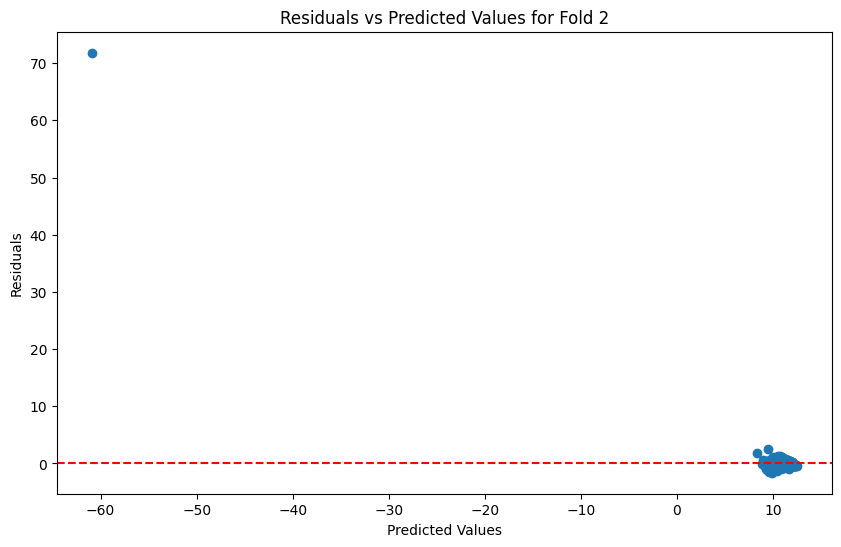

Cross-Validation RMSE Scores without Fold 2 outliers: [np.float64(0.4081673841732749), np.float64(0.3907397568958221), np.float64(0.4097586800901856), np.float64(0.3995155313790053), np.float64(0.38419331295658243)]
Mean RMSE without Fold 2 outliers: 0.3984749330989741
Standard Deviation of RMSE without Fold 2 outliers: 0.00986049718376483


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_auto is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rmse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_pca), 1):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_pca = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    predictions = model_pca.predict(sm.add_constant(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold} RMSE: {rmse}")

# Investigate Fold 2
fold_2_train_index, fold_2_test_index = list(kf.split(X_pca))[1]
X_train_fold_2, X_test_fold_2 = X_pca[fold_2_train_index], X_pca[fold_2_test_index]
y_train_fold_2, y_test_fold_2 = y.iloc[fold_2_train_index], y.iloc[fold_2_test_index]

# Fit the model on Fold 2
model_fold_2 = sm.OLS(y_train_fold_2, sm.add_constant(X_train_fold_2)).fit()
predictions_fold_2 = model_fold_2.predict(sm.add_constant(X_test_fold_2))
rmse_fold_2 = np.sqrt(mean_squared_error(y_test_fold_2, predictions_fold_2))

print(f"Fold 2 RMSE: {rmse_fold_2}")

# Examine the residuals
residuals_fold_2 = y_test_fold_2 - predictions_fold_2
print(residuals_fold_2.describe())

# Identify outliers (e.g., residuals greater than 3 standard deviations from the mean)
outliers = residuals_fold_2[np.abs(residuals_fold_2) > 3 * residuals_fold_2.std()]
print(f"Number of outliers in Fold 2: {len(outliers)}")

# Remove outliers from Fold 2
X_test_fold_2_no_outliers = X_test_fold_2[~residuals_fold_2.index.isin(outliers.index)]
y_test_fold_2_no_outliers = y_test_fold_2[~residuals_fold_2.index.isin(outliers.index)]

# Recalculate RMSE for Fold 2 without outliers
predictions_fold_2_no_outliers = model_fold_2.predict(sm.add_constant(X_test_fold_2_no_outliers))
rmse_fold_2_no_outliers = np.sqrt(mean_squared_error(y_test_fold_2_no_outliers, predictions_fold_2_no_outliers))

print(f"Fold 2 RMSE without outliers: {rmse_fold_2_no_outliers}")

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions_fold_2, residuals_fold_2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Fold 2')
plt.show()

# Recalculate overall RMSE without Fold 2 outliers
rmse_scores_no_outliers = [rmse for i, rmse in enumerate(rmse_scores) if i != 1]
rmse_scores_no_outliers.append(rmse_fold_2_no_outliers)
mean_rmse_no_outliers = np.mean(rmse_scores_no_outliers)
std_rmse_no_outliers = np.std(rmse_scores_no_outliers)

print(f"Cross-Validation RMSE Scores without Fold 2 outliers: {rmse_scores_no_outliers}")
print(f"Mean RMSE without Fold 2 outliers: {mean_rmse_no_outliers}")
print(f"Standard Deviation of RMSE without Fold 2 outliers: {std_rmse_no_outliers}")

In [59]:
print(model_fold_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     754.4
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:47:22   Log-Likelihood:                -1925.5
No. Observations:                3910   AIC:                             3887.
Df Residuals:                    3892   BIC:                             4000.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8315      0.007   1634.929      0.0

In [60]:
# Assuming pca is the fitted PCA object
components = pca.components_

# Create a DataFrame to display the components
component_df = pd.DataFrame(components, columns=X.columns)

# Display the first few components
print(component_df.head())

   car_ages    car_hp    car_km  car_body_normalized_Coupe  \
0 -0.210979 -0.425228 -0.031773                  -0.127927   
1 -0.452084  0.167919 -0.046225                  -0.052065   
2 -0.019215  0.110075 -0.014699                  -0.015988   
3 -0.002026 -0.070486  0.068754                  -0.052024   
4 -0.083232  0.213061 -0.040606                   0.189123   

   car_body_normalized_Hatchback  car_body_normalized_MUV  \
0                       0.402312                -0.002397   
1                      -0.232615                -0.076999   
2                      -0.014877                -0.348917   
3                      -0.197014                -0.193565   
4                       0.275102                -0.309980   

   car_body_normalized_Pickup_Truck  car_body_normalized_SUV  \
0                         -0.118280                -0.195272   
1                         -0.033751                 0.470700   
2                         -0.258396                 0.289264   
3   

In [67]:
component_df

,car_ages,car_hp,car_km,car_body_normalized_Coupe,car_body_normalized_Hatchback,car_body_normalized_MUV,car_body_normalized_Pickup_Truck,car_body_normalized_SUV,car_body_normalized_Sedan,car_hand_2nd_hand,...,car_hand_4th_hand,car_fuel_Electro,car_fuel_Gasoline,car_fuel_Hybrid,car_fuel_Plug_in_Hybrid,car_transmission_Manual,car_transmission_Robotic,car_transmission_Variable,car_drive_FWD,car_drive_RWD
0,-0.210979,-0.425228,-0.031773,-0.127927,0.402312,-0.002397,-0.118280,-0.195272,-0.169576,0.159095,...,-0.171626,-0.008224,0.051011,0.093578,-0.098898,0.053518,0.262650,0.024697,0.487349,-0.337210
1,-0.452084,0.167919,-0.046225,-0.052065,-0.232615,-0.076999,-0.033751,0.470700,-0.238074,0.102226,...,-0.229272,0.229388,-0.330753,0.202274,0.157561,-0.180584,0.063221,0.131771,-0.025758,-0.119319
2,-0.019215,0.110075,-0.014699,-0.015988,-0.014877,-0.348917,-0.258396,0.289264,-0.082258,-0.068119,...,-0.035448,-0.134268,0.570186,-0.390733,-0.070225,-0.373416,0.091955,0.058765,-0.007585,-0.207025
3,-0.002026,-0.070486,0.068754,-0.052024,-0.197014,-0.193565,-0.147444,-0.166473,0.573727,0.131509,...,-0.195061,-0.112382,-0.019304,0.344802,-0.102809,-0.301614,-0.164594,0.430840,0.143229,0.045124
4,-0.083232,0.213061,-0.040606,0.189123,0.275102,-0.309980,-0.009679,-0.219228,0.085356,-0.083993,...,0.004463,-0.022578,-0.106570,0.241591,0.207504,-0.326822,0.511273,-0.333420,-0.074406,0.265059
5,-0.003649,-0.056518,0.049242,-0.145551,-0.079651,0.057298,-0.025137,0.075479,0.003363,-0.619044,...,-0.173750,0.172196,-0.166082,0.067409,0.066134,0.003963,0.000960,-0.076829,0.155591,-0.246120
6,0.157874,-0.082988,0.017726,-0.281021,0.115292,-0.332559,0.059849,0.091705,-0.035625,-0.299088,...,0.663582,0.060887,-0.123313,0.252626,-0.114306,-0.090953,-0.044006,0.130442,-0.019788,-0.173962
7,0.040797,-0.091559,0.160638,0.168925,0.235829,-0.258234,0.435709,0.094166,-0.359710,0.018925,...,-0.221206,-0.334835,-0.005057,0.192024,-0.124979,0.093593,-0.028146,0.354013,-0.280277,0.013134
8,-0.123277,-0.082209,-0.103357,0.472434,0.175571,-0.220382,-0.066901,-0.078103,-0.048638,-0.117975,...,-0.013402,0.627367,0.026948,-0.096135,-0.338744,0.007187,-0.247306,0.116774,0.043640,0.206532
9,0.019283,-0.030613,0.184132,-0.453664,0.006435,-0.308918,0.525509,-0.068312,0.199985,0.222064,...,-0.197861,0.354798,0.001455,-0.266185,-0.026342,-0.053044,-0.023372,-0.223543,-0.046756,-0.035406


In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Assuming df_auto_norm is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Fit the model using PCA components
model_pca = sm.OLS(y, sm.add_constant(X_pca)).fit()

# Example car data for prediction
example_car = pd.DataFrame({
    'car_ages': [8],  # Example: 5 years old
    'car_hp': [130],  # Example: 150 horsepower
    'car_km': [120000],  # Example: 50,000 km
    'car_body_normalized_Coupe': [1],
    'car_body_normalized_Hatchback': [0],
    'car_body_normalized_MUV': [0],
    'car_body_normalized_Pickup_Truck': [0],
    'car_body_normalized_SUV': [0],  # Example: SUV
    'car_body_normalized_Sedan': [0],
    'car_hand_2nd_hand': [3],  # Example: 2nd hand
    'car_hand_3rd_hand': [0],
    'car_hand_4th_hand': [0],
    'car_fuel_Electro': [0],
    'car_fuel_Gasoline': [1],  # Example: Gasoline
    'car_fuel_Hybrid': [0],
    'car_fuel_Plug_in_Hybrid': [0],
    'car_transmission_Manual': [0],
    'car_transmission_Robotic': [0],
    'car_transmission_Variable': [0],
    'car_drive_FWD': [1],  # Example: FWD
    'car_drive_RWD': [0]
})

# Ensure the example data has the same columns as the training data
example_car = pd.get_dummies(example_car)
example_car = example_car.reindex(columns=X.columns, fill_value=0)

# Standardize the example data
example_car_scaled = scaler.transform(example_car)

# Apply PCA to the example data
example_car_pca = pca.transform(example_car_scaled)

# Add a constant term to the example data
example_car_pca = np.insert(example_car_pca, 0, 1, axis=1)

# Check the shapes of the input data and model parameters
print(f"Shape of example_car_pca: {example_car_pca.shape}")
print(f"Shape of model parameters: {model_pca.params.shape}")

# Predict the log price using the trained model
log_price_prediction = model_pca.predict(example_car_pca)

# Convert log price to actual price
price_prediction = np.exp(log_price_prediction)

print(f"Predicted Car Price: {price_prediction[0]}")

Shape of example_car_pca: (1, 18)
Shape of model parameters: (18,)
Predicted Car Price: 49211.58573099491


In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Assuming df_auto_norm is already loaded and preprocessed

# Define the features and target variable
X = df_auto_norm[['car_ages', 'car_hp', 'car_km', 'car_body_normalized_Coupe', 'car_body_normalized_Hatchback', 'car_body_normalized_MUV', 'car_body_normalized_Pickup_Truck', 'car_body_normalized_SUV', 'car_body_normalized_Sedan', 'car_hand_2nd_hand', 'car_hand_3rd_hand', 'car_hand_4th_hand', 'car_fuel_Electro', 'car_fuel_Gasoline', 'car_fuel_Hybrid', 'car_fuel_Plug_in_Hybrid', 'car_transmission_Manual', 'car_transmission_Robotic', 'car_transmission_Variable', 'car_drive_FWD', 'car_drive_RWD']]
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
y = df_auto['log_price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Fit the model using PCA components
model_pca = sm.OLS(y, sm.add_constant(X_pca)).fit()

# Example car data for prediction
example_car = pd.DataFrame({
    'car_ages': [8],  # Example: 5 years old
    'car_hp': [130],  # Example: 150 horsepower
    'car_km': [120000],  # Example: 50,000 km
    'car_body_normalized_Coupe': [1],
    'car_body_normalized_Hatchback': [0],
    'car_body_normalized_MUV': [0],
    'car_body_normalized_Pickup_Truck': [0],
    'car_body_normalized_SUV': [0],  # Example: SUV
    'car_body_normalized_Sedan': [0],
    'car_hand_2nd_hand': [3],  # Example: 2nd hand
    'car_hand_3rd_hand': [0],
    'car_hand_4th_hand': [0],
    'car_fuel_Electro': [0],
    'car_fuel_Gasoline': [1],  # Example: Gasoline
    'car_fuel_Hybrid': [0],
    'car_fuel_Plug_in_Hybrid': [0],
    'car_transmission_Manual': [0],
    'car_transmission_Robotic': [0],
    'car_transmission_Variable': [0],
    'car_drive_FWD': [1],  # Example: FWD
    'car_drive_RWD': [0]
})

# Ensure the example data has the same columns as the training data
example_car = pd.get_dummies(example_car)
example_car = example_car.reindex(columns=X.columns, fill_value=0)

# Standardize the example data
example_car_scaled = scaler.transform(example_car)

# Apply PCA to the example data
example_car_pca = pca.transform(example_car_scaled)

# Add a constant term to the example data
example_car_pca = np.insert(example_car_pca, 0, 1, axis=1)

# Check the shapes of the input data and model parameters
# print(f"Shape of example_car_pca: {example_car_pca.shape}")
# print(f"Shape of model parameters: {model_pca.params.shape}")

# Predict the log price using the trained model
prediction_result = model_pca.get_prediction(example_car_pca)

# Extract the predicted log price and confidence intervals
log_price_prediction = prediction_result.predicted_mean
conf_int = prediction_result.conf_int()

# Convert log price to actual price
price_prediction = np.exp(log_price_prediction)
conf_int_exp = np.exp(conf_int)

print(f"Predicted Car Price: {price_prediction[0]}")
print(f"95% Confidence Interval: {round(conf_int_exp[0][0],2)}-{round(conf_int_exp[0][1],2)}")

Predicted Car Price: 49211.58573099491
95% Confidence Interval: 40612.64-59631.2


In [70]:
import pickle
import os

# Define the path to the models directory
models_dir = r'C:\Users\v_gol\Desktop\car-price-prediction-israel\models'

# Save the trained model in the models directory
model_path = os.path.join(models_dir, 'trained_model_pca_autoboom.pkl')
with open(model_path, 'wb') as model_file:
    pickle.dump(model_pca, model_file)

print(f"Model saved successfully at {model_path}.")

Model saved successfully at C:\Users\v_gol\Desktop\car-price-prediction-israel\models\trained_model_pca_autoboom.pkl.
